In [89]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample as RS
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LogisticRegression as LR 
from sklearn.metrics import accuracy_score as a_s
from sklearn.metrics import confusion_matrix as c_m
from sklearn.metrics import classification_report as c_r
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as ss
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import random as rd
import locale
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from biokit.viz import corrplot
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data_lst = pd.read_csv("/Users/xianghuihuang/Desktop/final_project_255/listings.csv")
data_lst.shape
data_lst.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
summary                                          218
space                                           1138
description                                       30
experiences_offered                                0
neighborhood_overview                           2003
notes                                           2928
transit                                         2368
access                                          2738
interaction                                     2544
house_rules                                     2052
thumbnail_url                                   7833
medium_url                                      7833
picture_url                                        0
xl_picture_url                                

In [3]:
data_lst.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [4]:
#drop the data 'city' is N/A
data_lst_1= data_lst.dropna(subset=['city'])
data_lst_1.to_csv('data_lst_1.csv',index=0)
data_lst_1.shape

(7823, 106)

In [5]:
data_lst_1.city.describe() 

count              7823
unique                9
top       San Francisco
freq               7781
Name: city, dtype: object

In [6]:
#keep the data 'city'contains'San Francisco'
data_lst_sf=data_lst_1[data_lst_1['city'].str.contains('San Francisco')]
data_lst_sf.to_csv('data_lst_sf.csv',index=0)
data_lst_sf.shape

(7787, 106)

In [7]:
#remove the unncessary columns
data_lst_cutc= data_lst_sf.drop(['listing_url','scrape_id','last_scraped','experiences_offered','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_name','host_location','host_acceptance_rate','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','street','neighbourhood_group_cleansed','market','smart_location','country_code','country','is_location_exact','square_feet','guests_included','extra_people','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','availability_30','availability_60','availability_90','availability_365','calendar_last_scraped','number_of_reviews_ltm','first_review','last_review','review_scores_accuracy','requires_license','license','jurisdiction_names','is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month'],1)
data_lst_cutc.to_csv('data_lst_cutc.csv',index=0)
data_lst_cutc.shape

(7787, 52)

In [8]:
data_lst_cutc.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,958,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,...,30,199,97.0,10.0,10.0,10.0,10.0,9.0,t,moderate
1,3850,Charming room for two,Your own private room plus access to a shared ...,"This is the first room I rented on Airbnb, sta...",Your own private room plus access to a shared ...,"This is a quiet, safe neighborhood on a substa...",Here is the complete list of House Rules you a...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",...,5,136,94.0,9.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period
2,5858,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,...,60,111,98.0,10.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period
3,7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",Please email your picture id with print name (...,N Juda Muni and bus stop. Street parking.,NaN,NaN,...,60,17,85.0,8.0,9.0,9.0,9.0,8.0,f,strict_14_with_grace_period
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,NaN,Please email your picture id with print name (...,"N Juda Muni, Bus and UCSF Shuttle. small shopp...",NaN,NaN,...,90,8,93.0,9.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period


In [9]:
data_lst_cutc.tail()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
7828,37460323,"5 bedroom house by beach, clean and convenient","Renovated 5 bedroom, 3 bath home with garage p...","Main floor has 3 bedrooms, 2 bathrooms, kitche...","Renovated 5 bedroom, 3 bath home with garage p...",NaN,NaN,NaN,NaN,I am away from the property often as I travel ...,...,180,0,NaN,NaN,NaN,NaN,NaN,NaN,t,strict_14_with_grace_period
7829,37467170,2 bedrooms/1 bath private guest suite w/st.par...,Comfortable and relaxing 2 bedroom and 1 bath ...,*There is free parking in front of home for gu...,Comfortable and relaxing 2 bedroom and 1 bath ...,*Quiet and peaceful neighborhood for visiting SF.,NaN,*Minutes to Interstate 280 and Highway 101 *SF...,NaN,Host family lives upstairs of house - a quiet ...,...,27,0,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
7830,37469573,One of a Kind San Francisco Victorian- Turret ...,Step back in time in my San Francisco victoria...,65 steps up into your own private space within...,Step back in time in my San Francisco victoria...,Sitting just across the street from The Panhan...,- I have 3 dogs (2 Great Danes and a Lab). Whi...,The best way to get around town is via Uber/ L...,Guests will have their own private and keyless...,While I live a private part of the house (sepa...,...,14,0,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
7831,37489792,San Francisco 1B1B Apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period
7832,37497197,Nice private bedroom has parking,Charming 2 bedrooms 1 bath flat has a shared k...,"This charming flat has 2 bedrooms, 1 bath, kit...",Charming 2 bedrooms 1 bath flat has a shared k...,NaN,NaN,NaN,NaN,NaN,...,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period


In [10]:
# dropping more unnecessary columns
data = data_lst_cutc
data = data.drop(['weekly_price', 'monthly_price','city','state','host_since'],axis = 1)
data = data.drop(['neighbourhood'],axis = 1)
data.shape
data.isnull().sum()

id                                0
name                              0
summary                         217
space                          1134
description                      30
neighborhood_overview          1979
notes                          2906
transit                        2345
access                         2719
interaction                    2526
house_rules                    2030
host_id                           0
host_about                     1855
host_response_time              790
host_response_rate              790
host_is_superhost                 1
host_total_listings_count         1
host_verifications                0
host_has_profile_pic              1
host_identity_verified            1
neighbourhood_cleansed            0
zipcode                         242
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                   

In [11]:
data.isnull().sum().sort_values(ascending = False)

notes                          2906
access                         2719
interaction                    2526
transit                        2345
house_rules                    2030
neighborhood_overview          1979
host_about                     1855
review_scores_value            1598
review_scores_location         1598
review_scores_checkin          1598
review_scores_cleanliness      1595
review_scores_communication    1594
review_scores_rating           1592
security_deposit               1588
space                          1134
cleaning_fee                    845
host_response_rate              790
host_response_time              790
zipcode                         242
summary                         217
description                      30
bathrooms                        18
beds                             11
bedrooms                          3
host_total_listings_count         1
host_has_profile_pic              1
cancellation_policy               1
host_identity_verified      

In [12]:
data.shape

(7787, 46)

In [13]:
missing_data = data.isnull().sum().sort_values(ascending = False)
missing_data_rate = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
print(missing_data_rate)

notes                          0.373186
access                         0.349172
interaction                    0.324387
transit                        0.301143
house_rules                    0.260691
neighborhood_overview          0.254142
host_about                     0.238218
review_scores_value            0.205214
review_scores_location         0.205214
review_scores_checkin          0.205214
review_scores_cleanliness      0.204829
review_scores_communication    0.204700
review_scores_rating           0.204443
security_deposit               0.203930
space                          0.145627
cleaning_fee                   0.108514
host_response_rate             0.101451
host_response_time             0.101451
zipcode                        0.031077
summary                        0.027867
description                    0.003853
bathrooms                      0.002312
beds                           0.001413
bedrooms                       0.000385
host_total_listings_count      0.000128


In [14]:
df = data.dropna(axis=0, subset=['id','host_verifications','room_type','accommodates','property_type','amenities','price','bed_type','host_identity_verified','minimum_nights','maximum_nights','instant_bookable','neighbourhood_cleansed','host_is_superhost','host_total_listings_count','number_of_reviews','host_has_profile_pic','longitude','latitude','cancellation_policy','bedrooms','beds','bathrooms','description','summary'])

In [15]:
print(df.shape)

(7544, 46)


In [16]:
# filled in rows with null values 
df ['notes']= data['notes'].fillna(value = 'nothing', axis=0)
df ['host_response_rate']= data['host_response_rate'].fillna(value = 0, axis=0)
df ['security_deposit']= data['security_deposit'].fillna(value = 0, axis=0)
df ['space']= data['space'].fillna(value = 'nothing', axis=0)
df ['neighborhood_overview']= data['neighborhood_overview'].fillna(value = 'nothing', axis=0)
df ['transit']= data['transit'].fillna(value = 'nothing', axis=0)
df ['access']= data['access'].fillna(value = 'nothing', axis=0)
df ['interaction']= data['interaction'].fillna(value = 'nothing', axis=0)
df ['house_rules']= data['house_rules'].fillna(value = 'nothing', axis=0)
df ['host_about']= data['host_about'].fillna(value = 'nothing', axis=0)
df ['host_response_time']= data['host_response_time'].fillna(value = 'nothing', axis=0)
df ['cleaning_fee']= data['cleaning_fee'].fillna(value = 'NULL', axis=0)
df ['review_scores_rating']= data['review_scores_rating'].fillna(value = 'nothing', axis=0)
df ['review_scores_cleanliness']= data['review_scores_cleanliness'].fillna(value = 'nothing', axis=0)
df ['review_scores_checkin']= data['review_scores_checkin'].fillna(value = 'nothing', axis=0)
df ['review_scores_communication']= data['review_scores_communication'].fillna(value = 'nothing', axis=0)
df ['review_scores_location']= data['review_scores_location'].fillna(value = 'nothing', axis=0)
df ['review_scores_value']= data['review_scores_value'].fillna(value = 'nothing', axis=0)
df ['zipcode']= data['zipcode'].fillna(value = 'nothing', axis=0)

In [17]:
df.isnull().sum()

id                             0
name                           0
summary                        0
space                          0
description                    0
neighborhood_overview          0
notes                          0
transit                        0
access                         0
interaction                    0
house_rules                    0
host_id                        0
host_about                     0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
zipcode                        0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type  

In [18]:
df.dtypes

id                               int64
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
notes                           object
transit                         object
access                          object
interaction                     object
house_rules                     object
host_id                          int64
host_about                      object
host_response_time              object
host_response_rate              object
host_is_superhost               object
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic            object
host_identity_verified          object
neighbourhood_cleansed          object
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                

In [19]:
# switch to object to numerical
df['host_response_time'].value_counts()
convert_host_response_time = {"host_response_time":{"within an hour":1, "within a few hours":2, "within a day": 3, "a few days or more":4, "nothing":0}}
df.replace(convert_host_response_time, inplace = True)
df['host_response_time'].value_counts()

1    4643
2    1336
0     758
3     728
4      79
Name: host_response_time, dtype: int64

In [20]:
# switch to object to numerical

df["host_is_superhost"].value_counts()
convert_host_is_superhost = {"host_is_superhost":{"f":0,"t":1}}
df.replace(convert_host_is_superhost, inplace=True)
df["host_is_superhost"].value_counts()

0    4198
1    3346
Name: host_is_superhost, dtype: int64

In [21]:
# switch to object to numerical

df["host_has_profile_pic"].value_counts()
convert_host_has_profile_pic = {"host_has_profile_pic": {"t":1, "f": 0}}
df.replace(convert_host_has_profile_pic, inplace=True)
df["host_has_profile_pic"].value_counts()

1    7503
0      41
Name: host_has_profile_pic, dtype: int64

In [22]:
# switch to object to numerical

df["host_identity_verified"].value_counts()
convert_host_identity_verified = {"host_identity_verified":{"t":1, "f":0}}
df.replace(convert_host_identity_verified, inplace=True)
df["host_identity_verified"].value_counts()

1    4060
0    3484
Name: host_identity_verified, dtype: int64

In [23]:
# switch to object to numerical

df["neighbourhood_cleansed"].value_counts()
convert_neighbourhood_cleansed = {"neighbourhood_cleansed":{"Mission":1, "South of Market":2, "Downtown/Civic Center":3, "Western Addition":4, "Castro/Upper Market":5, "Bernal Heights":6, "Haight Ashbury":7, "Noe Valley":8, "Nob Hill":9, "Outer Sunset":10, "Potrero Hill":11, "Inner Richmond":12, "Marina":13, "Bayview":14, "Russian Hill":15, "North Beach":16, "Inner Sunset":17, "Excelsior":18, "Outer Mission":19, "Financial District":20, "Outer Richmond":21, "Pacific Heights":22, "West of Twin Peaks":23, "Parkside":24, "Chinatown":25, "Ocean View":26, "Visitacion Valley":27, "Twin Peaks":28, "Glen Park":29, "Lakeshore":30, "Crocker Amazon":31, "Presidio Heights":32, "Seacliff":33, "Diamond Heights":34, "Golden Gate Park":35, "Presidio":36}}
df.replace(convert_neighbourhood_cleansed, inplace=True)
df["neighbourhood_cleansed"].value_counts()

1     726
2     642
3     613
4     603
5     413
6     383
7     365
8     318
9     297
10    282
11    233
12    187
13    182
14    180
15    167
16    164
18    163
17    163
19    161
20    156
21    155
22    145
23    131
24    129
25    119
26    105
27     78
28     65
29     64
30     52
31     36
32     24
33     21
34     17
35      4
36      1
Name: neighbourhood_cleansed, dtype: int64

In [24]:
df["bed_type"].value_counts()
convert_bed_type = {"bed_type":{"Real Bed":1, "Futon":2, "Pull-out Sofa":3, "Airbed":4, "Couch":5}}
df.replace(convert_bed_type, inplace=True)
df["bed_type"].value_counts()

1    7476
2      31
3      23
4       9
5       5
Name: bed_type, dtype: int64

In [25]:
convert_room_type = {"room_type":{"Entire home/apt":1,"Private room":2, "Shared room":3}}
df.replace(convert_room_type, inplace=True)
df["room_type"].value_counts()

1    4538
2    2783
3     223
Name: room_type, dtype: int64

In [26]:
convert_instant_bookable = {"instant_bookable":{"t":1, "f": 0}}
df.replace(convert_instant_bookable, inplace=True)
df["instant_bookable"].value_counts()

0    4550
1    2994
Name: instant_bookable, dtype: int64

In [27]:
convert_cancellation_policy = {"cancellation_policy":{"strict_14_with_grace_period":1, "moderate":2, "flexible":3, "super_strict_30":4, "super_strict_60":5, "strict":6}}
df.replace(convert_cancellation_policy, inplace=True)
df["cancellation_policy"].value_counts()

1    3314
2    2522
3    1560
6      97
4      32
5      19
Name: cancellation_policy, dtype: int64

In [28]:
df.dtypes

id                               int64
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
notes                           object
transit                         object
access                          object
interaction                     object
house_rules                     object
host_id                          int64
host_about                      object
host_response_time               int64
host_response_rate              object
host_is_superhost                int64
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic             int64
host_identity_verified           int64
neighbourhood_cleansed           int64
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                

In [29]:
df.dtypes

id                               int64
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
notes                           object
transit                         object
access                          object
interaction                     object
house_rules                     object
host_id                          int64
host_about                      object
host_response_time               int64
host_response_rate              object
host_is_superhost                int64
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic             int64
host_identity_verified           int64
neighbourhood_cleansed           int64
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                

In [30]:
# removing special characters in price
# convert string to float for price column
df['price'] = (df['price'].str.replace(r'[^-+\d.]', '').astype(float))

In [31]:
df.dtypes

id                               int64
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
notes                           object
transit                         object
access                          object
interaction                     object
house_rules                     object
host_id                          int64
host_about                      object
host_response_time               int64
host_response_rate              object
host_is_superhost                int64
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic             int64
host_identity_verified           int64
neighbourhood_cleansed           int64
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                

In [32]:
df.isnull().sum()

id                             0
name                           0
summary                        0
space                          0
description                    0
neighborhood_overview          0
notes                          0
transit                        0
access                         0
interaction                    0
house_rules                    0
host_id                        0
host_about                     0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
zipcode                        0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type  

In [33]:
print(df.head(2))

     id                                 name  \
0   958  Bright, Modern Garden Unit - 1BR/1B   
1  3850                Charming room for two   

                                             summary  \
0  New update: the house next door is under const...   
1  Your own private room plus access to a shared ...   

                                               space  \
0  Newly remodeled, modern, and bright garden uni...   
1  This is the first room I rented on Airbnb, sta...   

                                         description  \
0  New update: the house next door is under const...   
1  Your own private room plus access to a shared ...   

                               neighborhood_overview  \
0  *Quiet cul de sac in friendly neighborhood *St...   
1  This is a quiet, safe neighborhood on a substa...   

                                               notes  \
0  Due to the fact that we have children and a do...   
1  Here is the complete list of House Rules you a...   

          

In [34]:
#Removing the Duplicates if any 
df.duplicated().sum() 
df.drop_duplicates(inplace=True)

In [35]:
df.dtypes

id                               int64
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
notes                           object
transit                         object
access                          object
interaction                     object
house_rules                     object
host_id                          int64
host_about                      object
host_response_time               int64
host_response_rate              object
host_is_superhost                int64
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic             int64
host_identity_verified           int64
neighbourhood_cleansed           int64
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                

In [36]:
data = df

In [37]:
data["property_type"].value_counts()

Apartment             3039
House                 2127
Condominium            823
Guest suite            544
Boutique hotel         226
Hotel                  150
Townhouse              140
Serviced apartment     121
Loft                    90
Hostel                  85
Guesthouse              40
Bed and breakfast       35
Aparthotel              30
Other                   28
Bungalow                18
Resort                  17
Villa                    9
Cottage                  8
Tiny house               3
Cabin                    2
Boat                     2
Earth house              2
Camper/RV                1
In-law                   1
Castle                   1
Timeshare                1
Dome house               1
Name: property_type, dtype: int64

In [38]:
# category the property_type
data["property_type"][data["property_type"].str.contains("Condominium")]="Apartment"
data["property_type"][data["property_type"].str.contains("Guest suite")]="Apartment"
data["property_type"][data["property_type"].str.contains("apartment")]="Apartment"
data["property_type"][data["property_type"].str.contains("Loft")]="Apartment"

data["property_type"][data["property_type"].str.contains("house")]="House"
data["property_type"][data["property_type"].str.contains("Villa")]="House"
data["property_type"][data["property_type"].str.contains("Cottage")]="House"
data["property_type"][data["property_type"].str.contains("Boat")]="House"
data["property_type"][data["property_type"].str.contains("Cabin")]="House"

data["property_type"][data["property_type"].str.contains("hotel")]="Hotel"
data["property_type"][data["property_type"].str.contains("Hotel")]="Hotel"
data["property_type"][data["property_type"].str.contains("Bungalow")]="Hotel"
data["property_type"][data["property_type"].str.contains("Resort")]="Hotel"
data["property_type"][data["property_type"].str.contains("Timeshare")]="Hotel"

data["property_type"][data["property_type"].str.contains("Hostel")]="Other"
data["property_type"][data["property_type"].str.contains("Bed and breakfast")]="Other"
data["property_type"][data["property_type"].str.contains("In-law")]="Other"
data["property_type"][data["property_type"].str.contains("Camper")]="Other"
data["property_type"][data["property_type"].str.contains("Castle")]="Other"

convert_property_type = {"property_type":{"Apartment":1,"House":2,"Hotel":3,"Other":4}}
data.replace(convert_property_type, inplace=True)

In [39]:
data["property_type"].value_counts()

1    4617
2    2334
3     442
4     151
Name: property_type, dtype: int64

In [40]:
data.dtypes

id                               int64
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
notes                           object
transit                         object
access                          object
interaction                     object
house_rules                     object
host_id                          int64
host_about                      object
host_response_time               int64
host_response_rate              object
host_is_superhost                int64
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic             int64
host_identity_verified           int64
neighbourhood_cleansed           int64
zipcode                         object
latitude                       float64
longitude                      float64
property_type                    int64
room_type                

In [41]:
#converting some category_types and float_types
data["property_type"]=data["property_type"].astype('category')
data["room_type"]=data["room_type"].astype('category')
data["host_response_time"]=data["host_response_time"].astype('category')
data["host_is_superhost"]=data["host_is_superhost"].astype('category')
data["zipcode"]= data["zipcode"].str.replace(r'[^-+\d.]', '').astype('category')
data["host_has_profile_pic"]=data["host_has_profile_pic"].astype('category')
data["neighbourhood_cleansed"]=data["neighbourhood_cleansed"].astype('category')
data["bed_type"]=data["bed_type"].astype('category')
data["instant_bookable"]=data["instant_bookable"].astype('category')
data["security_deposit"]=data["security_deposit"].str.replace(r'[^-+\d.]', '').astype('float')
data["host_response_rate"]= data["host_response_rate"].str.replace(r'[^-+\d.]', '').astype(float)
#data["cleaning_fee"]=data["cleaning_fee"].str.replace(r'[^-+\d.]', '').astype('float')
data["cancellation_policy"]=data["cancellation_policy"].astype('category')

In [42]:
data.head(2)

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,958,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,...,30,199,97,10,10,10,10,9,1,2
1,3850,Charming room for two,Your own private room plus access to a shared ...,"This is the first room I rented on Airbnb, sta...",Your own private room plus access to a shared ...,"This is a quiet, safe neighborhood on a substa...",Here is the complete list of House Rules you a...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",...,5,136,94,9,10,10,9,9,0,1


In [43]:
data.shape

(7544, 46)

In [44]:
data.dtypes

id                                int64
name                             object
summary                          object
space                            object
description                      object
neighborhood_overview            object
notes                            object
transit                          object
access                           object
interaction                      object
house_rules                      object
host_id                           int64
host_about                       object
host_response_time             category
host_response_rate              float64
host_is_superhost              category
host_total_listings_count       float64
host_verifications               object
host_has_profile_pic           category
host_identity_verified            int64
neighbourhood_cleansed         category
zipcode                        category
latitude                        float64
longitude                       float64
property_type                  category


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7544 entries, 0 to 7832
Data columns (total 46 columns):
id                             7544 non-null int64
name                           7544 non-null object
summary                        7544 non-null object
space                          7544 non-null object
description                    7544 non-null object
neighborhood_overview          7544 non-null object
notes                          7544 non-null object
transit                        7544 non-null object
access                         7544 non-null object
interaction                    7544 non-null object
house_rules                    7544 non-null object
host_id                        7544 non-null int64
host_about                     7544 non-null object
host_response_time             7544 non-null category
host_response_rate             6786 non-null float64
host_is_superhost              7544 non-null category
host_total_listings_count      7544 non-null float64
host_

In [46]:
data.isnull().sum().sort_values(ascending = False)

security_deposit               1518
host_response_rate              758
cancellation_policy               0
host_identity_verified            0
host_has_profile_pic              0
host_verifications                0
host_total_listings_count         0
host_is_superhost                 0
host_response_time                0
host_about                        0
host_id                           0
house_rules                       0
zipcode                           0
interaction                       0
access                            0
transit                           0
notes                             0
neighborhood_overview             0
description                       0
space                             0
summary                           0
name                              0
neighbourhood_cleansed            0
latitude                          0
instant_bookable                  0
longitude                         0
review_scores_value               0
review_scores_location      

In [47]:
data ['host_response_rate']= data['host_response_rate'].fillna(value = 0, axis=0)
data ['security_deposit']= data['security_deposit'].fillna(value = 0, axis=0)

In [48]:
data.isnull().sum().sort_values(ascending = False)

cancellation_policy            0
host_id                        0
neighbourhood_cleansed         0
host_identity_verified         0
host_has_profile_pic           0
host_verifications             0
host_total_listings_count      0
host_is_superhost              0
host_response_rate             0
host_response_time             0
host_about                     0
house_rules                    0
instant_bookable               0
interaction                    0
access                         0
transit                        0
notes                          0
neighborhood_overview          0
description                    0
space                          0
summary                        0
name                           0
zipcode                        0
latitude                       0
longitude                      0
property_type                  0
review_scores_value            0
review_scores_location         0
review_scores_communication    0
review_scores_checkin          0
review_sco

In [49]:
#converting some category_types and float_types
data["property_type"]=data["property_type"].astype('category')
data["room_type"]=data["room_type"].astype('category')
data["host_response_time"]=data["host_response_time"].astype('category')
data["host_is_superhost"]=data["host_is_superhost"].astype('category')
#data["zipcode"]= data["zipcode"].astype('category')
data["host_identity_verified"]=data["host_identity_verified"].astype('category')
data["host_has_profile_pic"]=data["host_has_profile_pic"].astype('category')
#data["neighbourhood_cleansed"]=data["neighbourhood_cleansed"].astype('category')
data["bed_type"]=data["bed_type"].astype('category')
data["instant_bookable"]=data["instant_bookable"].astype('category')
data["cancellation_policy"]=data["cancellation_policy"].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7544 entries, 0 to 7832
Data columns (total 46 columns):
id                             7544 non-null int64
name                           7544 non-null object
summary                        7544 non-null object
space                          7544 non-null object
description                    7544 non-null object
neighborhood_overview          7544 non-null object
notes                          7544 non-null object
transit                        7544 non-null object
access                         7544 non-null object
interaction                    7544 non-null object
house_rules                    7544 non-null object
host_id                        7544 non-null int64
host_about                     7544 non-null object
host_response_time             7544 non-null category
host_response_rate             7544 non-null float64
host_is_superhost              7544 non-null category
host_total_listings_count      7544 non-null float64
host_

In [50]:
data.columns

Index(['id', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy'],
      dtype='object')

In [51]:
# select necessary columns for Analysis & Prediction
# cleaned dataset
data_new= data.loc[:,['id',
                     'host_response_time',
                     'host_response_rate',
                     'host_is_superhost',
                     'host_total_listings_count',
                     'host_has_profile_pic',
                     'neighbourhood_cleansed',
                     'zipcode',
                     'latitude',
                     'longitude',
                     'property_type',
                     'room_type',
                     'accommodates',
                     'bathrooms',
                     'bedrooms',
                     'beds',
                     'bed_type',               
                     'price',
                     'security_deposit',
                     'cleaning_fee',
                     'minimum_nights',
                     'maximum_nights',
                     'number_of_reviews',
                     'instant_bookable',
                      'cancellation_policy']]
data_new.shape

(7544, 25)

In [52]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7544 entries, 0 to 7832
Data columns (total 25 columns):
id                           7544 non-null int64
host_response_time           7544 non-null category
host_response_rate           7544 non-null float64
host_is_superhost            7544 non-null category
host_total_listings_count    7544 non-null float64
host_has_profile_pic         7544 non-null category
neighbourhood_cleansed       7544 non-null category
zipcode                      7544 non-null category
latitude                     7544 non-null float64
longitude                    7544 non-null float64
property_type                7544 non-null category
room_type                    7544 non-null category
accommodates                 7544 non-null int64
bathrooms                    7544 non-null float64
bedrooms                     7544 non-null float64
beds                         7544 non-null float64
bed_type                     7544 non-null category
price                 

In [53]:
data_new.describe()

,id,host_response_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,minimum_nights,maximum_nights,number_of_reviews
count,7.544000e+03,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7.544000e+03,7.544000e+03,7544.000000
mean,1.925502e+07,86.670864,81.283006,37.766186,-122.429945,3.184915,1.390840,1.348489,1.766569,215.797720,380.455859,1.327207e+04,1.379514e+04,44.049973
std,1.142713e+07,30.977880,281.401593,0.022546,0.026725,1.917600,0.905436,0.926779,1.181294,258.190685,702.202771,1.151328e+06,1.151323e+06,75.168306
min,9.580000e+02,0.000000,0.000000,37.708380,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000
25%,8.763266e+06,95.000000,1.000000,37.751593,-122.442328,2.000000,1.000000,1.000000,1.000000,100.000000,0.000000,2.000000e+00,2.900000e+01,1.000000
50%,2.072360e+07,100.000000,2.000000,37.768755,-122.424475,2.000000,1.000000,1.000000,1.000000,152.000000,150.000000,4.000000e+00,1.800000e+02,11.000000
75%,2.984479e+07,100.000000,10.000000,37.785487,-122.410720,4.000000,1.500000,2.000000,2.000000,249.000000,500.000000,3.000000e+01,1.125000e+03,53.000000
max,3.749720e+07,100.000000,1465.000000,37.810310,-122.368570,16.000000,10.000000,8.000000,20.000000,8000.000000,5100.000000,1.000000e+08,1.000000e+08,730.000000


Index(['id', 'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'instant_bookable', 'cancellation_policy'],
      dtype='object')

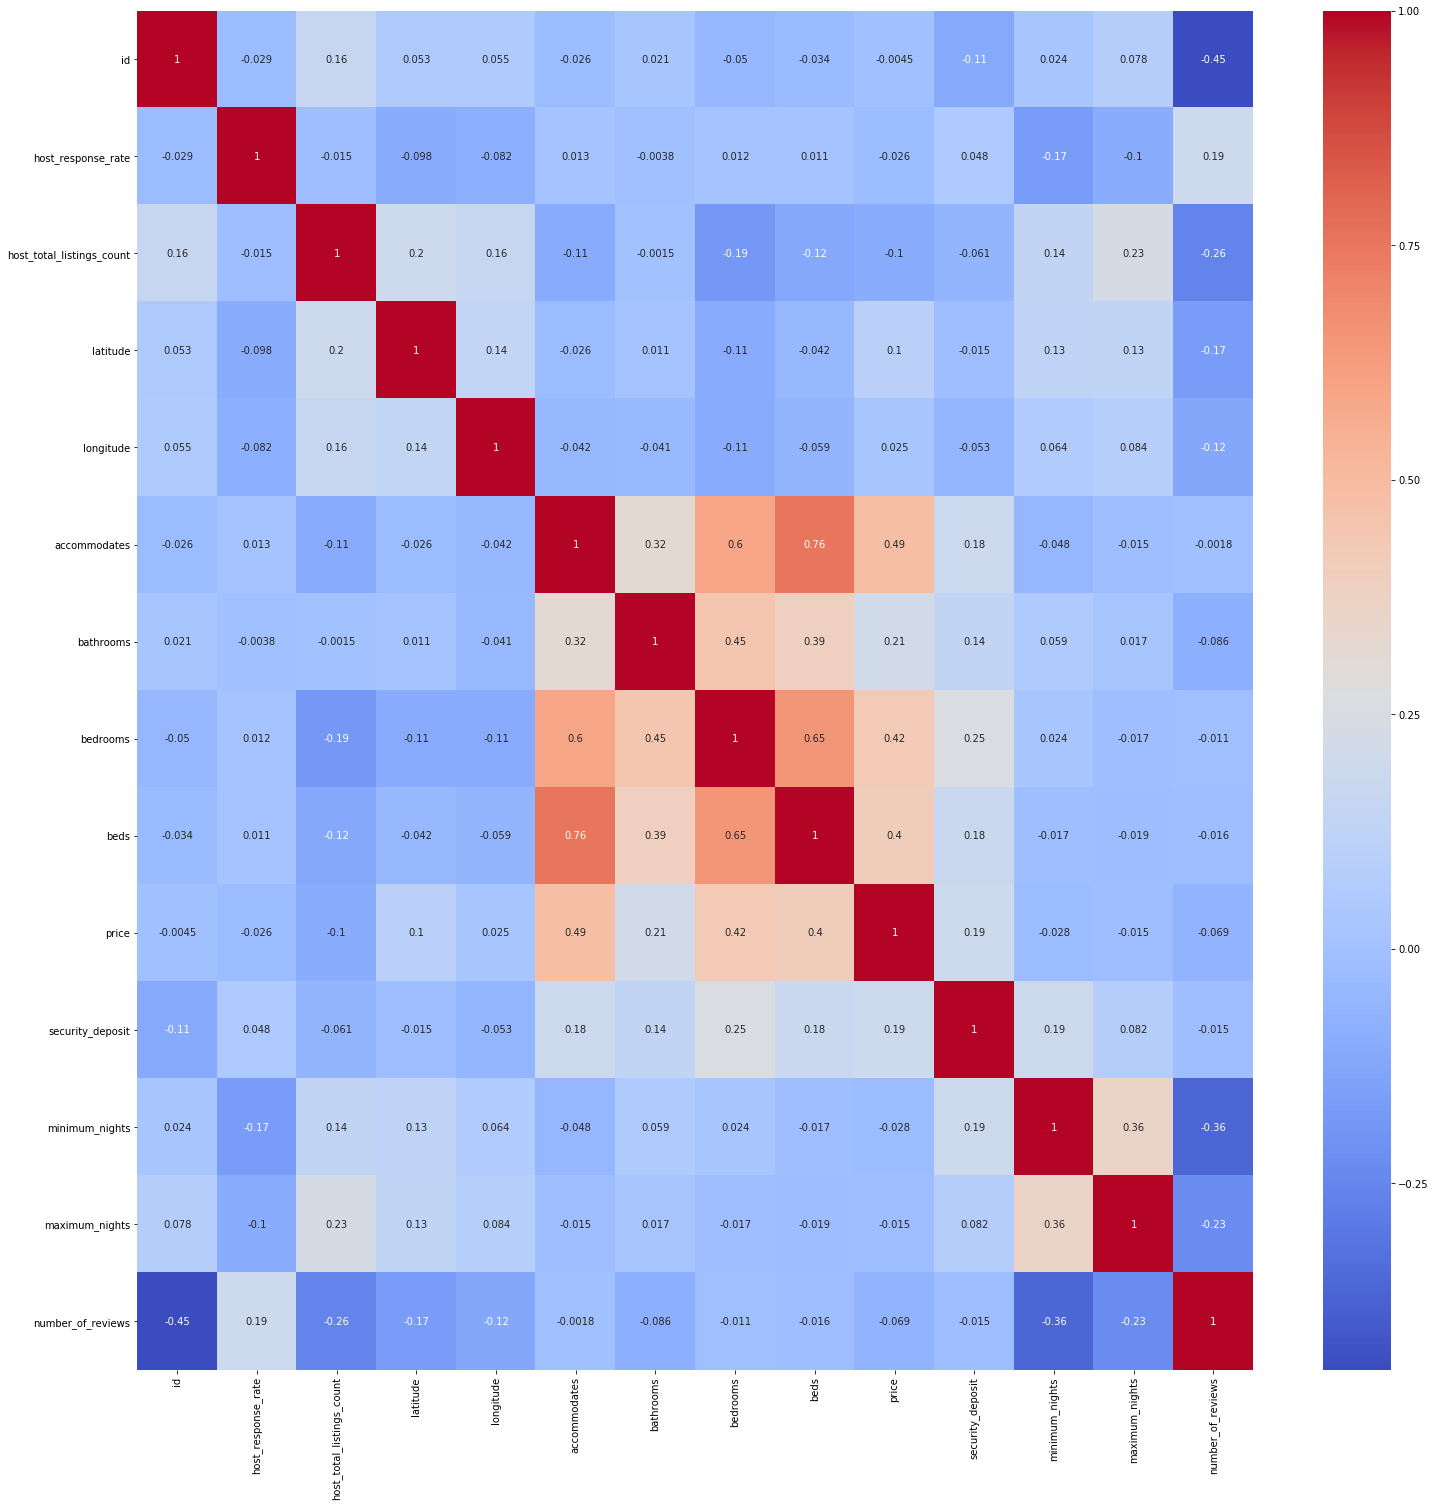

In [54]:
#Get Correlation between different variables
corr = data_new.corr(method='kendall')
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True,cmap='coolwarm')
data_new.columns

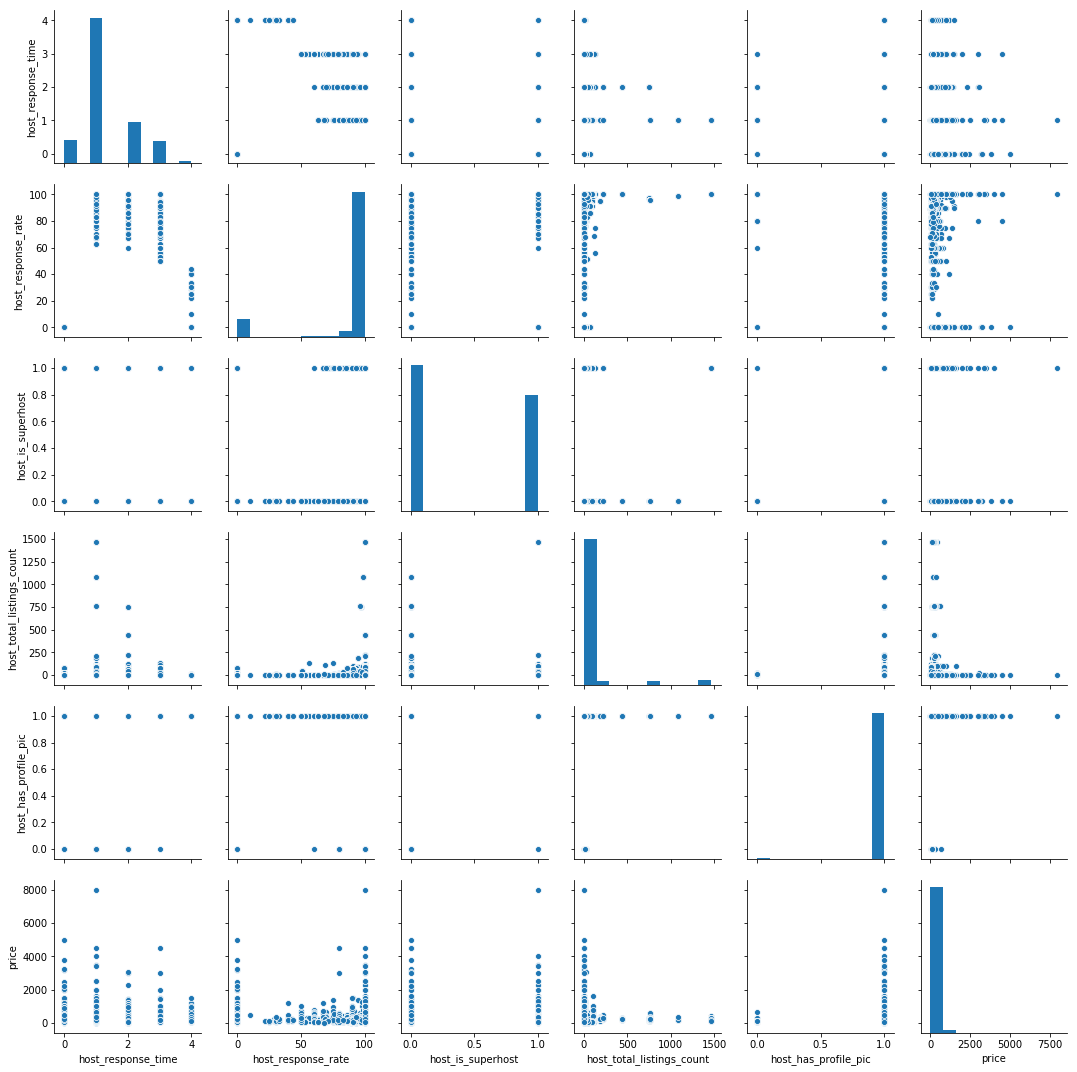

In [55]:
# Look at correlation
g = sns.pairplot(data_new[['host_response_time',
                     'host_response_rate',
                     'host_is_superhost',
                     'host_total_listings_count',
                     'host_has_profile_pic',
                     'price'
                         ]]
                )

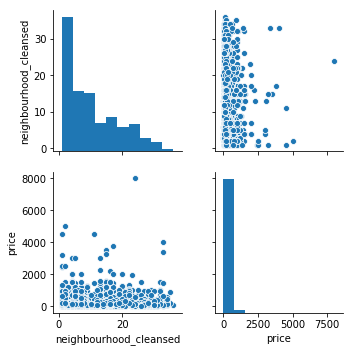

In [56]:
g = sns.pairplot(data_new[['neighbourhood_cleansed',
                     'zipcode',               
                     'price'
                     ]])

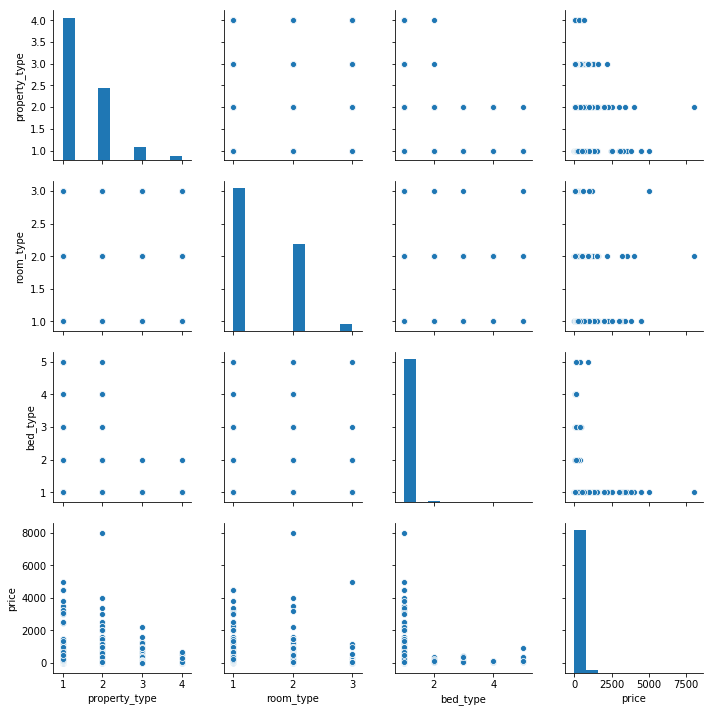

In [57]:
g = sns.pairplot(data_new[['property_type',
                     'room_type',                     
                     'bed_type',               
                     'price'
                     ]])

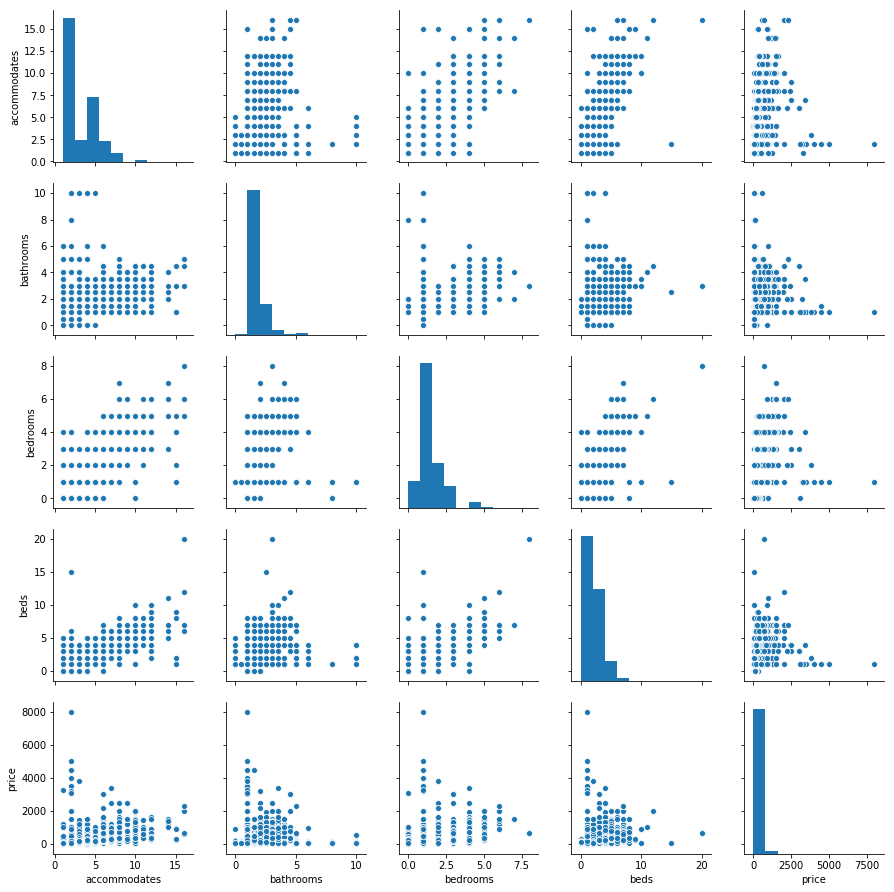

In [58]:
g = sns.pairplot(data_new[['accommodates',
                     'bathrooms',
                     'bedrooms',
                     'beds',              
                     'price'
                     ]])

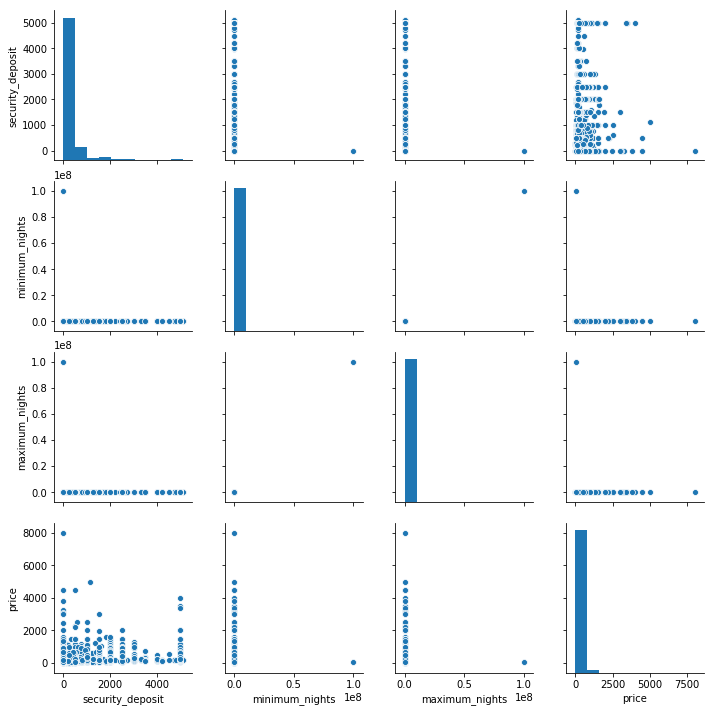

In [59]:
g = sns.pairplot(data_new[['security_deposit',
                     'cleaning_fee',
                     'minimum_nights',
                     'maximum_nights',
                    'price'
                     ]])

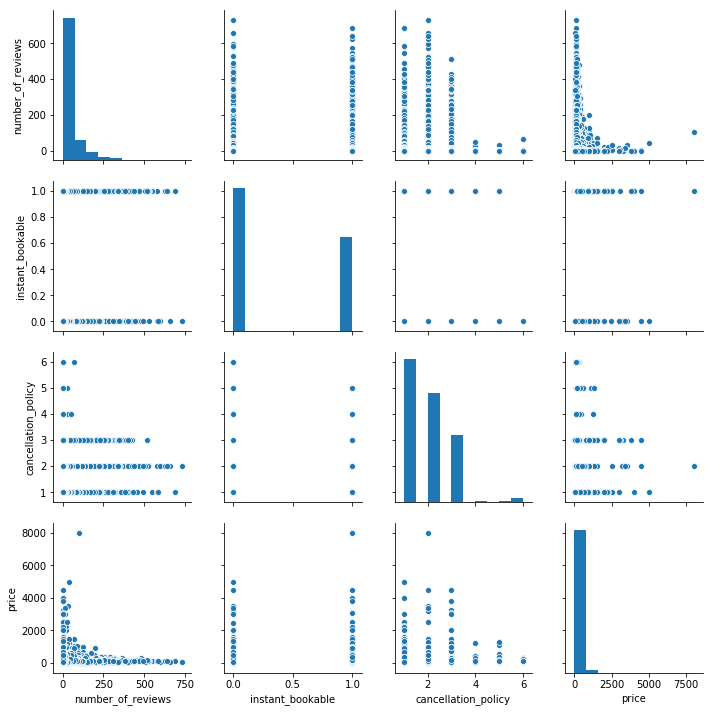

In [60]:
g = sns.pairplot(data_new[['number_of_reviews',
                     'instant_bookable',
                    'cancellation_policy',
                    'price'
                     ]])                     

TypeError: data type not understood

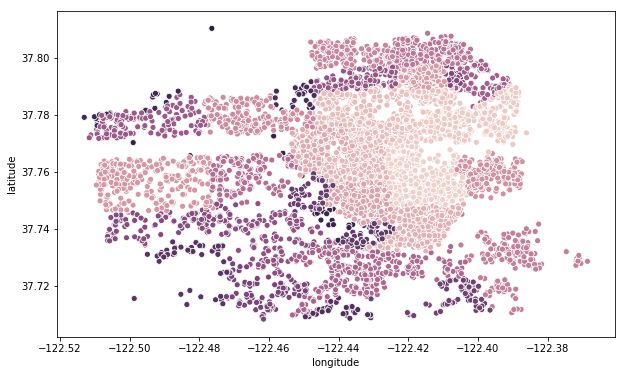

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data_new.longitude,data_new.latitude,hue=data_new.neighbourhood_cleansed)
plt.ioff()

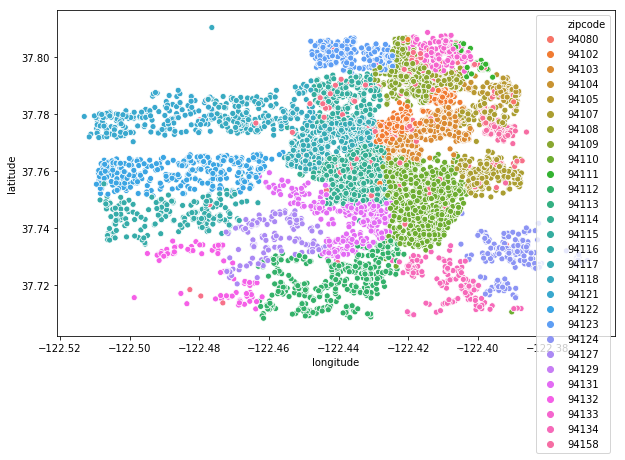

In [62]:
# Color-Map based on zip code & long/lat

plt.figure(figsize=(10,6))
sns.scatterplot(data_new.longitude,data_new.latitude,hue=data_new.zipcode)
plt.ioff()

In [63]:
p=data_new.price.describe()
print(p)

count    7544.000000
mean      215.797720
std       258.190685
min         0.000000
25%       100.000000
50%       152.000000
75%       249.000000
max      8000.000000
Name: price, dtype: float64


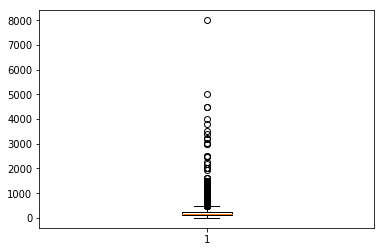

In [64]:
#boxplot of price
plt.boxplot(data_new.price)
plt.show()

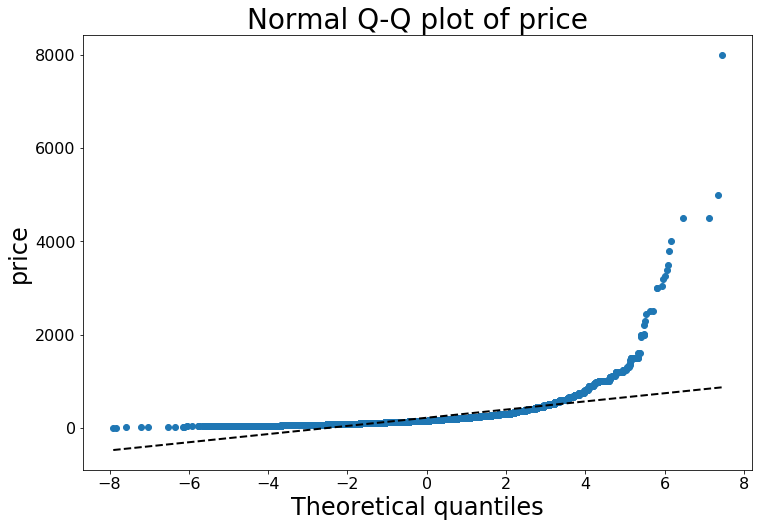

In [67]:
#Normal Q-Q plot of price
price_sort=data_new["price"].sort_values()
norm=rd.normal(0,2,len(price_sort))
norm.sort()

plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,price_sort,"o")

#generate a trend line 
z = np.polyfit(norm,price_sort, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot of price", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("price", size=24)
plt.tick_params(labelsize=16)
plt.show()

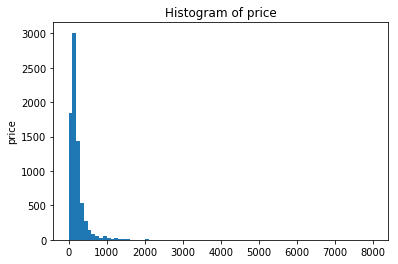

In [68]:
#Histogram
plt.title('Histogram of price')
plt.hist(data_new.price, bins=80)
plt.ylabel('price')
plt.show()

price after Outlier Removal:



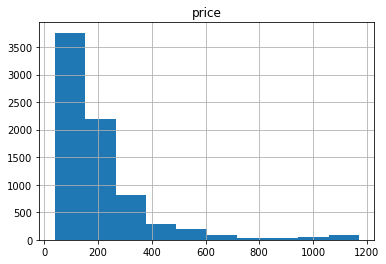

In [69]:
#Outlier Removal:remove 1% of the data from the feature
UPPERBOUND, LOWERBOUND = np.percentile(data_new.price, [1,99])
data_new.price = np.clip(data_new.price, UPPERBOUND, LOWERBOUND)
pd.DataFrame(data_new.price).hist()
print('price after Outlier Removal:\n')

In [70]:
p=data_new.price.describe()
print(p)

count    7544.000000
mean      208.276135
std       182.437391
min        38.000000
25%       100.000000
50%       152.000000
75%       249.000000
max      1171.660000
Name: price, dtype: float64


In [71]:
# bining price
#price_ranges=[p['min']-1,p['mean'],p['max']+1]
#price_labels=['low','high']
# pd.cut(ori_data, bins, labels)
#data_new['price_level']=pd.cut(data_new['price'],price_ranges,labels=price_labels)
data_new['price_level']=pd.cut(data_new['price'],5,precision=1)

In [72]:
data_new['price_level'].value_counts()

(36.9, 264.7]      5952
(264.7, 491.5]     1097
(491.5, 718.2]      286
(944.9, 1171.7]     137
(718.2, 944.9]       72
Name: price_level, dtype: int64

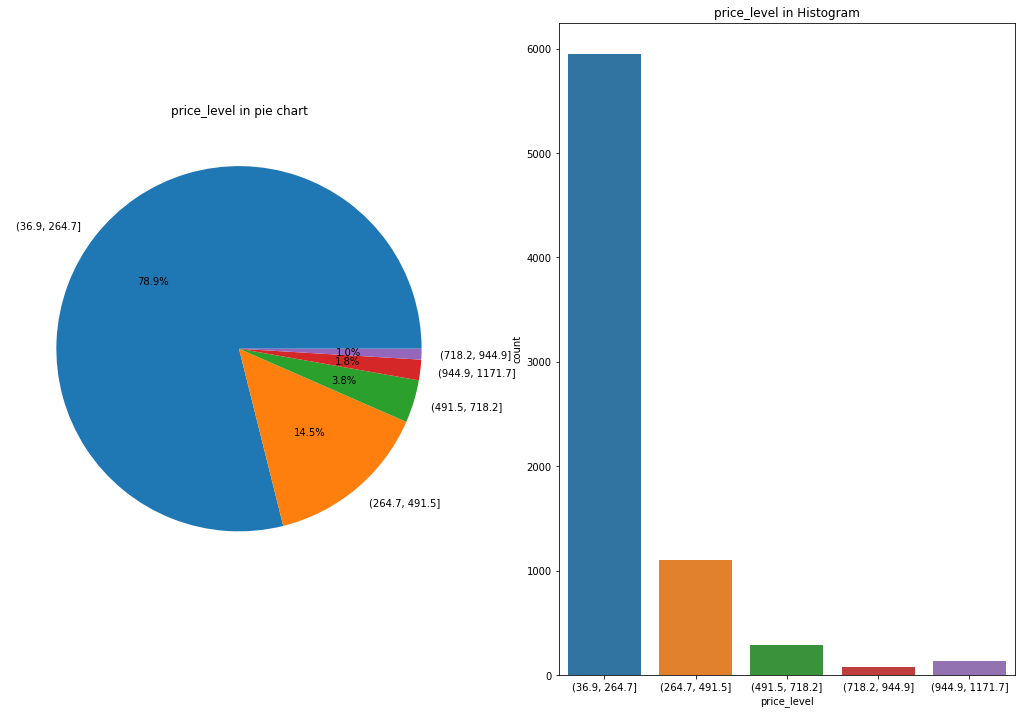

Number of low price(36.9, 264.8] : 5952
Number of medium price(264.8, 491.6]:  1097
Number of high price(491.6, 718.4]  :  286
Number of higher price(718.4, 945.2]:  72
Number of highest price(945.2, 1172.0]:  137


In [73]:
#plot value counts for price_level in pie chart and Histogram
f,ax=plt.subplots(1,2,figsize=(18,12))
#data_new['price_level'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
data_new['price_level'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax[0],subplots=True)
ax[0].set_title('price_level in pie chart')
ax[0].set_ylabel('')
sns.countplot(label='count',x='price_level',data=data_new,ax=ax[1])
ax[1].set_title('price_level in Histogram')
plt.show()
low_price, medium_price, high_price ,highest_price,higher_price = data_new['price_level'].value_counts()
print("Number of low price(36.9, 264.8] :" , low_price)
print('Number of medium price(264.8, 491.6]: ',medium_price)
print('Number of high price(491.6, 718.4]  : ',high_price)
print('Number of higher price(718.4, 945.2]: ',higher_price)
print('Number of highest price(945.2, 1172.0]: ',highest_price)

In [74]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7544 entries, 0 to 7832
Data columns (total 26 columns):
id                           7544 non-null int64
host_response_time           7544 non-null category
host_response_rate           7544 non-null float64
host_is_superhost            7544 non-null category
host_total_listings_count    7544 non-null float64
host_has_profile_pic         7544 non-null category
neighbourhood_cleansed       7544 non-null category
zipcode                      7544 non-null category
latitude                     7544 non-null float64
longitude                    7544 non-null float64
property_type                7544 non-null category
room_type                    7544 non-null category
accommodates                 7544 non-null int64
bathrooms                    7544 non-null float64
bedrooms                     7544 non-null float64
beds                         7544 non-null float64
bed_type                     7544 non-null category
price                 

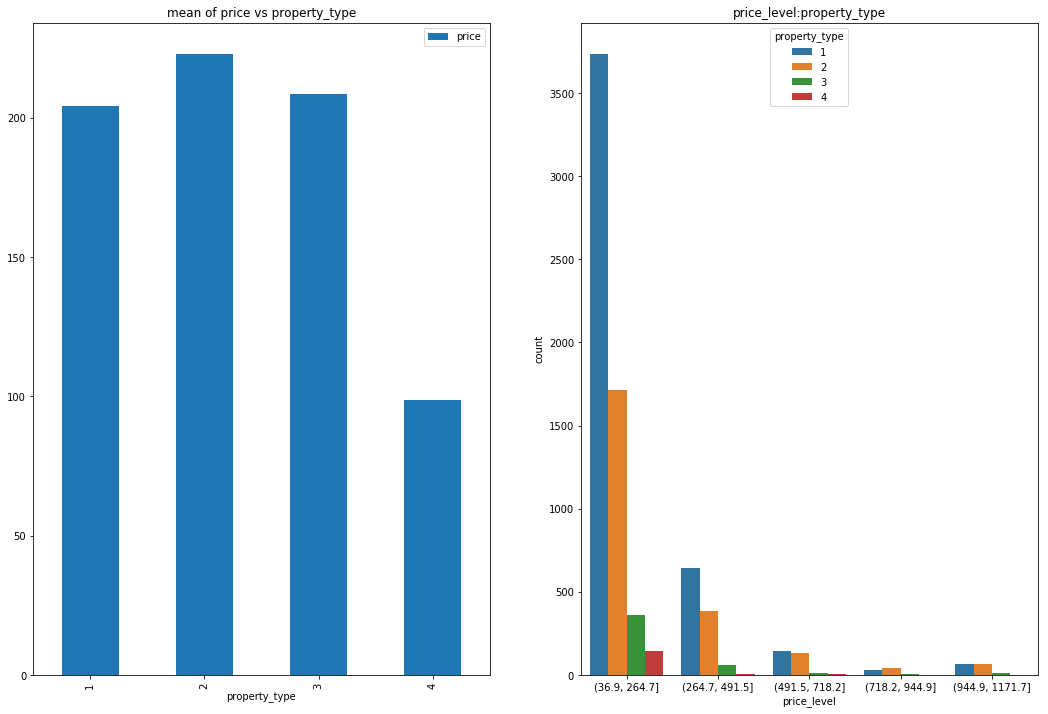

In [75]:
#plot mean of price vs property_type,and price_level:property_type
f,ax=plt.subplots(1,2,figsize=(18,12))
data_new[['price','property_type']].groupby(['property_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('mean of price vs property_type')
sns.countplot('price_level',hue='property_type',data=data_new,ax=ax[1])
ax[1].set_title('price_level:property_type')
plt.show()

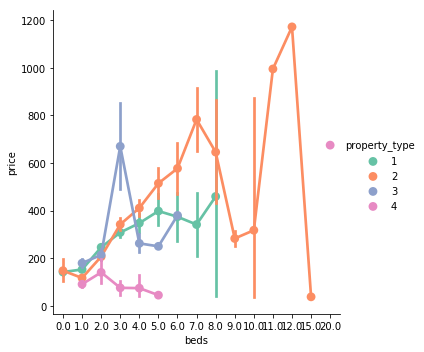

In [76]:
sns.factorplot('beds','price',hue='property_type',data=data_new, palette='Set2')
plt.show()

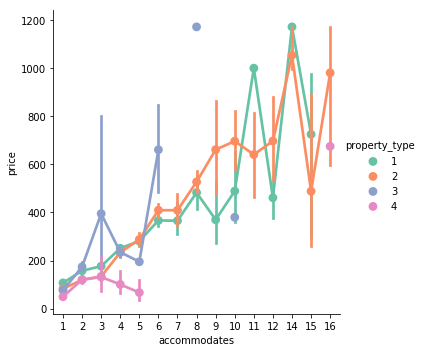

In [77]:
sns.factorplot('accommodates','price',hue='property_type',data=data_new, palette='Set2')
plt.show()

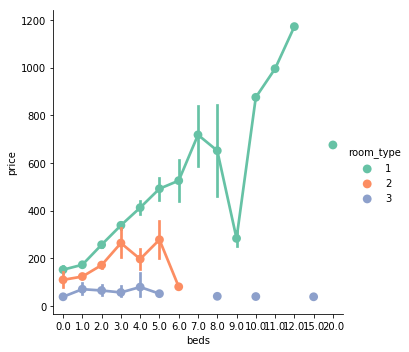

In [78]:
sns.factorplot('beds','price',hue='room_type',data=data_new, palette='Set2')
plt.show()

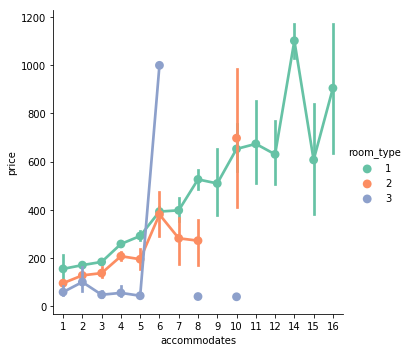

In [79]:
sns.factorplot('accommodates','price',hue='room_type',data=data_new, palette='Set2')
plt.show()

In [80]:
data_new.shape

(7544, 26)

In [81]:
#PCA
#select necessary columns for Prediction
#'zipcode' ,'latitude' and 'longitude' are similar with 'neighbourhood_cleansed'
# 'host_response_time','host_response_rate','number_of_reviews' can be known before listing
data_PCA= data_new.loc[:,['price',
                     'host_is_superhost',
                     'host_total_listings_count',
                     'host_has_profile_pic',
                     'neighbourhood_cleansed',
                     'property_type',
                     'room_type',
                     'accommodates',
                     'bathrooms',
                     'bedrooms',
                     'beds',
                     'bed_type',               
                     'security_deposit',
                     'cleaning_fee',
                     'minimum_nights',
                     'maximum_nights',                     
                     'instant_bookable',
                      'cancellation_policy']]
data_PCA.shape

(7544, 18)

In [82]:
data_PCA.head()

,price,host_is_superhost,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,170.0,1,1.0,1,4,1,1,3,1.0,1.0,2.0,1,100.0,$100.00,1,30,1,2
1,99.0,1,2.0,1,17,2,2,2,1.0,1.0,1.0,1,0.0,$10.00,1,5,0,1
3,65.0,1,10.0,1,7,1,2,2,4.0,1.0,1.0,1,200.0,$50.00,32,60,0,1
4,65.0,1,10.0,1,7,1,2,2,4.0,1.0,1.0,1,200.0,$50.00,32,90,0,1
5,475.0,0,2.0,1,4,2,1,4,1.5,2.0,2.0,1,0.0,$225.00,4,1125,0,2


In [83]:
data_PCA.isnull().sum()

price                        0
host_is_superhost            0
host_total_listings_count    0
host_has_profile_pic         0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
security_deposit             0
cleaning_fee                 0
minimum_nights               0
maximum_nights               0
instant_bookable             0
cancellation_policy          0
dtype: int64

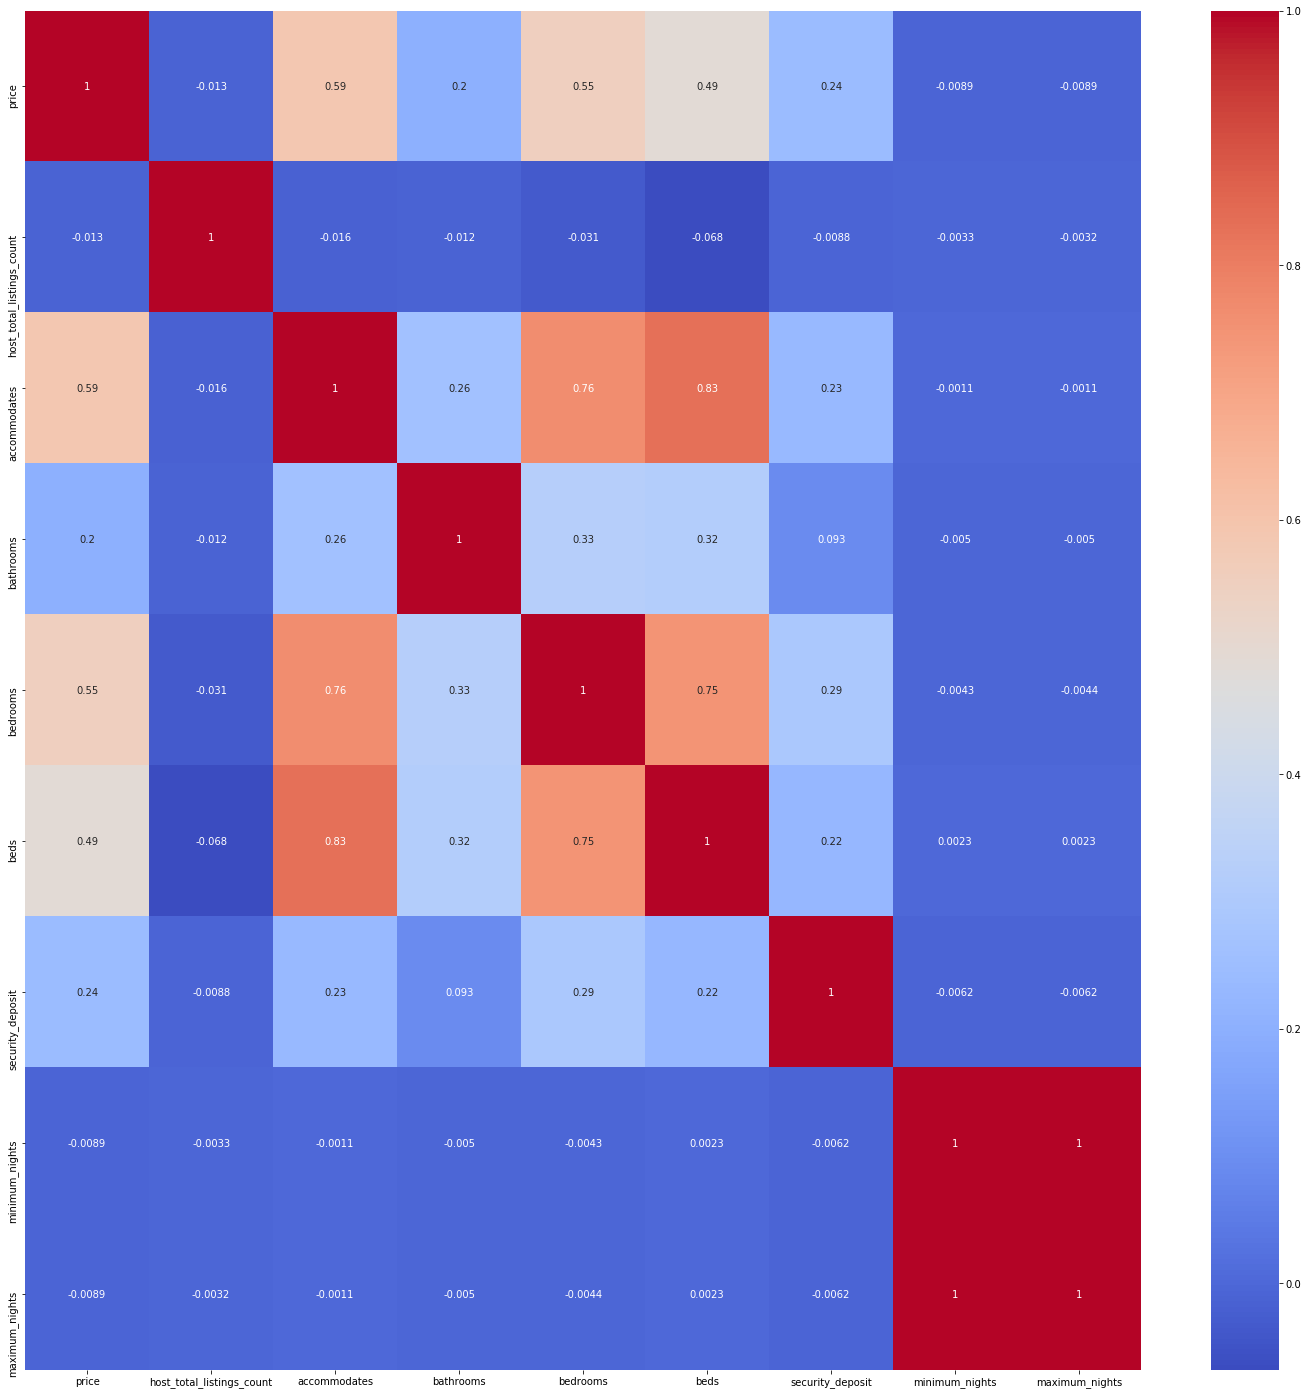

In [84]:
"""
When encountering a high degree of correlation between variables, 
the conventional approach is to calculate the correlation matrix between the variables,
then find two variables with a correlation higher than a certain value (such as 0.75),
and then delete one of them.
"""

#calculating the correlation between features
correlation=data_PCA.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [85]:
#drop the variables with a correlation higher than 0.75 (here we set it to 0.75)
data_PCA.drop(['accommodates', 'bedrooms','maximum_nights'], axis=1, inplace=True)

In [86]:
data_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7544 entries, 0 to 7832
Data columns (total 15 columns):
price                        7544 non-null float64
host_is_superhost            7544 non-null category
host_total_listings_count    7544 non-null float64
host_has_profile_pic         7544 non-null category
neighbourhood_cleansed       7544 non-null category
property_type                7544 non-null category
room_type                    7544 non-null category
bathrooms                    7544 non-null float64
beds                         7544 non-null float64
bed_type                     7544 non-null category
security_deposit             7544 non-null float64
cleaning_fee                 7544 non-null object
minimum_nights               7544 non-null int64
instant_bookable             7544 non-null category
cancellation_policy          7544 non-null category
dtypes: category(8), float64(5), int64(1), object(1)
memory usage: 852.9+ KB


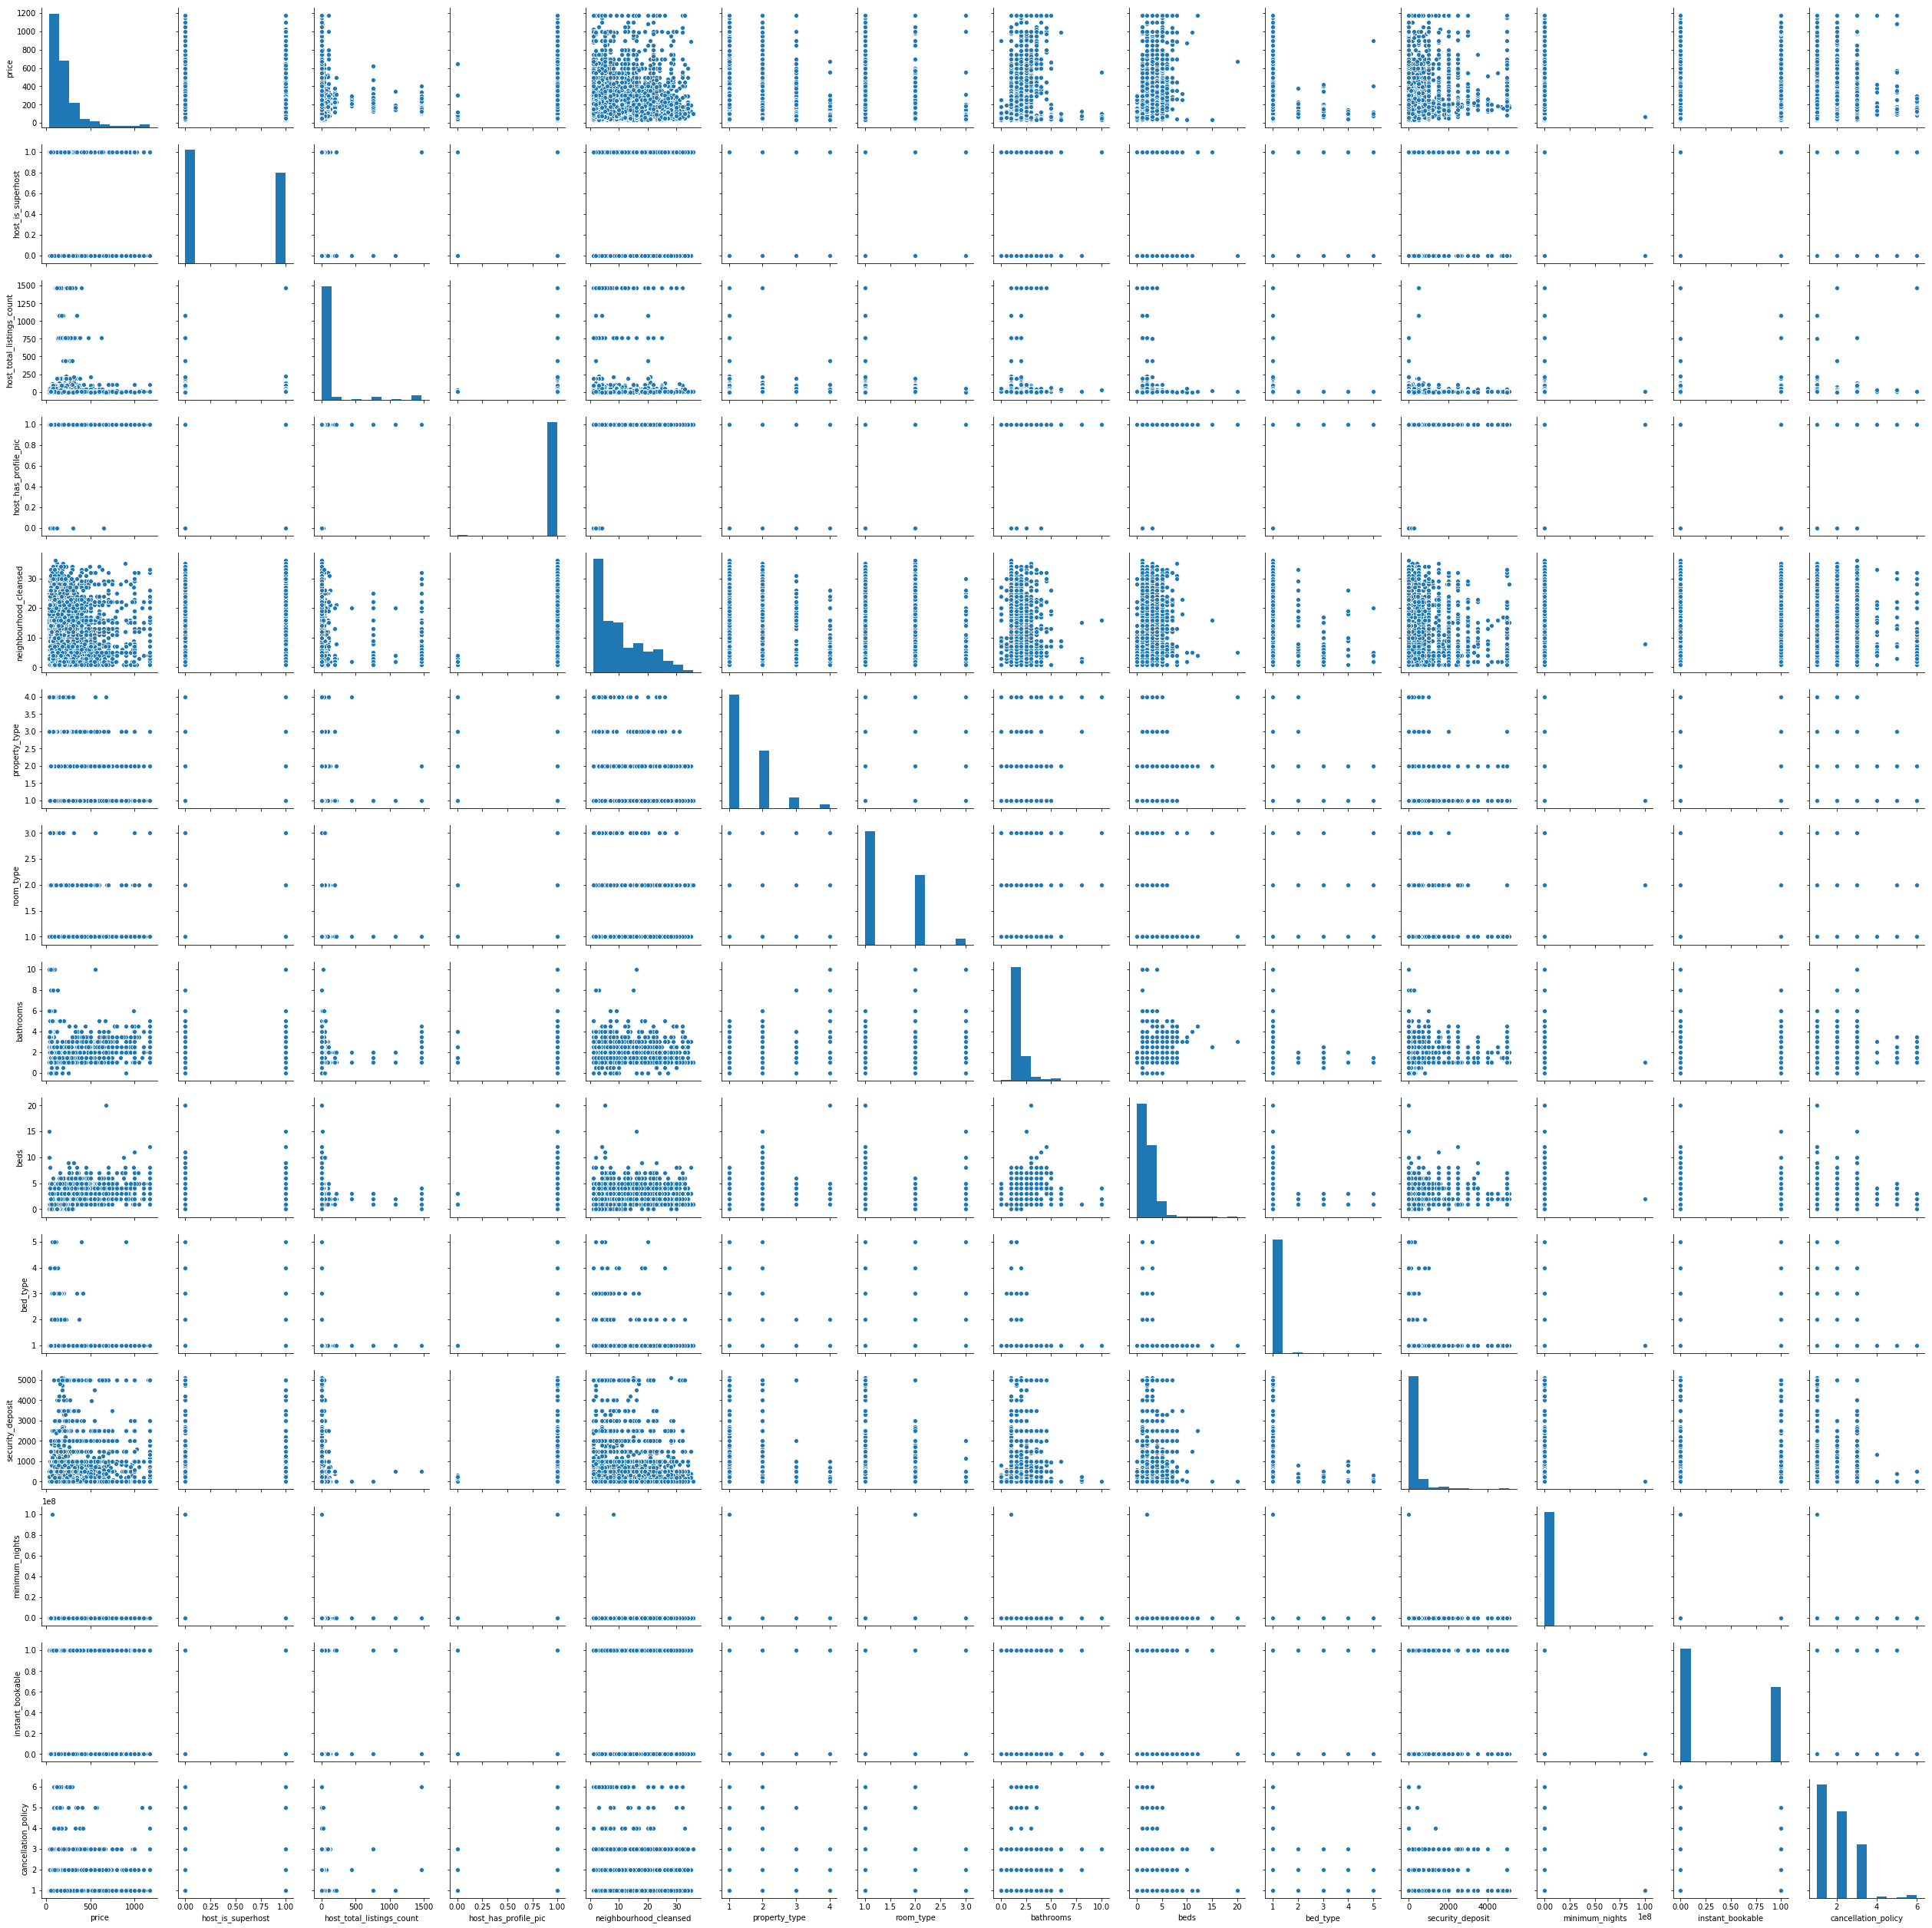

In [87]:
g = sns.pairplot(data_PCA)

In [90]:
# split into training and testing datasets
X = data_PCA.iloc[:, 1:].values
y=  data_PCA["price"].values
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=1)
print(X_train)
print(y_train)

[[0 92.0 1 ... 30 0 1]
 [1 2.0 1 ... 2 0 1]
 [0 1.0 1 ... 30 1 1]
 ...
 [0 1.0 1 ... 30 0 3]
 [1 3.0 1 ... 2 0 1]
 [0 3.0 1 ... 1 0 1]]
[ 80. 335. 185. ... 185. 105. 300.]
